# Further Regression Considerations

- Collinearity
- Cleaning and Preparing Data
- Test Train Split for Assessment


### Collinearity

The notion of independence of variables is related to the notion of collinearity.  Briefly, we find collinearity anytime we find strong relationships between dependent variables.  As we saw earlier, the relationship between `newspaper` and other mediums were interrelated to one another.  This can be detected by looking both at plots of the variables themselves against one another, examining the correlation coefficients of variables, and calculating the Variance in Frequency measure for the different features.

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix

### Feature Engineering and Cleaning


We want to return to our Housing example and consider how to use some of `scikitlearn`'s functionality to deal with missing values.  We want to determine the correct way of dealing with these one by one, and use some of what we know about the data to inform these decisions.  If we have objects that are missing values, we can either exclude the observations, or encode the missing values using some kind of numerical value.  


In [21]:
ames = pd.read_csv('data/ames_housing.csv')

In [22]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [25]:
ames['Alley'] = ames['Alley'].fillna("None")

In [26]:
ames['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [27]:
ames['FireplaceQu'] = ames['FireplaceQu'].fillna("None")

In [65]:
ames['MiscFeature'] = ames['MiscFeature'].fillna("None")

In [66]:
ames['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [67]:
ames = ames.replace({"MoSold": {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May',
                                6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}})

In [83]:
print(ames.MoSold.dtype)
ames['YearBuilt'].astype(str)

object


0       2003
1       1976
2       2001
3       1915
4       2000
5       1993
6       2004
7       1973
8       1931
9       1939
10      1965
11      2005
12      1962
13      2006
14      1960
15      1929
16      1970
17      1967
18      2004
19      1958
20      2005
21      1930
22      2002
23      1976
24      1968
25      2007
26      1951
27      2007
28      1957
29      1927
        ... 
1430    2005
1431    1976
1432    1927
1433    2000
1434    1977
1435    1962
1436    1971
1437    2008
1438    1957
1439    1979
1440    1922
1441    2004
1442    2008
1443    1916
1444    2004
1445    1966
1446    1962
1447    1995
1448    1910
1449    1970
1450    1974
1451    2008
1452    2005
1453    2006
1454    2004
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: object

In [86]:
ames[['YearBuilt', 'YrSold', 'YearRemodAdd']] = ames[['YearBuilt', 'YrSold', 'YearRemodAdd']].astype(str)

In [61]:
ames = ames.replace({"LotShape": {'Reg':4, 'IR1':3, 'IR2':2, 'IR1':1}})
ames = ames.replace({"Utilities": {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}})
ames = ames.replace({"LandSlope": {'Gtl':3, 'Mod':2, 'Sev':1}})

In [64]:
print(ames.YearBuilt.dtype)

int64


In [43]:
ames.MSSubClass = ames.MSSubClass.asobject

In [59]:
ames.YrSold = ames.YrSold.asobject


Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### Based on the data documentation, Lot Frontage seems like a meaningful feature, and 200 properties without values seems like too many to drop.  Further, since each record has a meaningful value for the "street" column, it doesn't seem appropriate to fill LotFrontage with 0s.  Mean/Median seems to be the best way to go.   

<IPython.core.display.Javascript object>


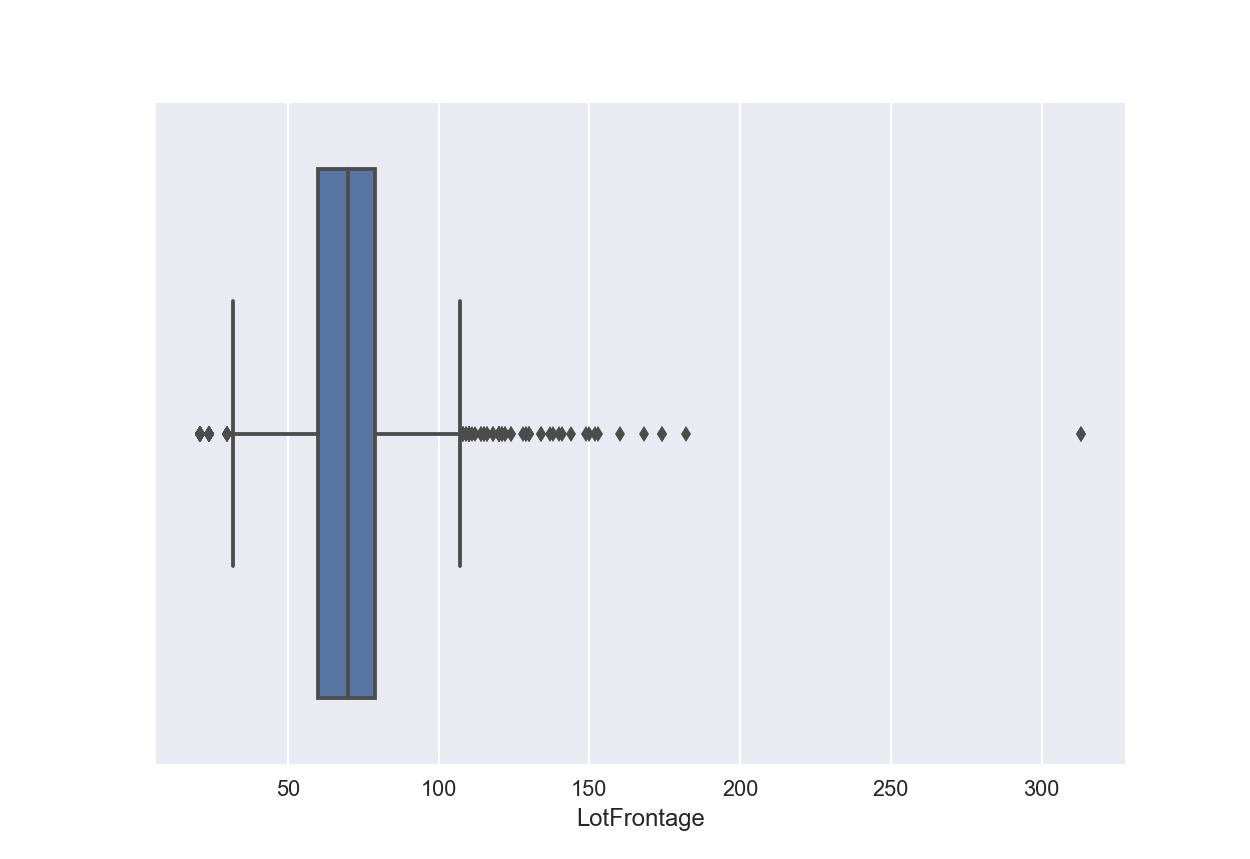

In [53]:
sns.boxplot(ames.LotFrontage)

In [54]:
print("Mean=",ames.LotFrontage.mean(),"Median=", ames.LotFrontage.median())


Mean= 70.04995836802642 Median= 70.04995836802665


In [52]:
ames.LotFrontage = ames.LotFrontage.fillna(ames.LotFrontage.mean())

Note the existence of a number of ordinal data points.  We can encode these to follow the data dictionary. https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [25]:
ames = ames.replace({"BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [26]:
ames['BsmtCond'].value_counts()

3.0    1311
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64

In [27]:
ames = ames.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [28]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

**PROBLEMS**

Continue to code a few more columns and make sure to replace any `na` values in at least:

- `OverallQual`
- `OverallCond`
- `GarageQual`
- `GarageCond`
- `PoolArea`
- `PoolQC`

In [29]:
ames = ames.replace({"BsmtQual" : {1: "isntgood"}})

In [38]:
ames['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [56]:
ames = ames.replace({"GarageQual" : {"None": 0, "No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [57]:
ames = ames.replace({"GarageCond" : {"None" : 0, "No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [71]:
ames.PoolQC.value_counts()

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64

In [58]:
ames = ames.replace({"PoolQC" : {"None" : 0, "No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [55]:
ames['PoolArea'] = ames['PoolArea'].fillna("None")

In [49]:
ames['GarageQual'] = ames['GarageQual'].fillna("None")
ames['GarageQual'].describe()

count     1460.0
unique       6.0
top          3.0
freq      1311.0
Name: GarageQual, dtype: float64

In [54]:
ames.GarageCond= ames.GarageCond.fillna("None")
ames.GarageCond.describe()

count     1460.0
unique       6.0
top          3.0
freq      1326.0
Name: GarageCond, dtype: float64

### Adding New Features

We can create many new features to help improve our models performance.  For example, any of the measures that have multiple categories could be combined.  Take `Overall`, `Garage`, and `Pool` for example.  We can create combinations of the subcolumns as follows.

In [ ]:
ames['BasementOverall'] = ames['BsmtCond'] * ames['BsmtQual']

In [72]:
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']

In [76]:
ames['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [78]:
ames['GarageOverall'] = ames['GarageCond'] * ames['GarageArea'] * ames['GarageCars']

In [85]:
ames['GarageArea'].values

array([548, 460, 608, ..., 252, 240, 276], dtype=int64)

**PROBLEMS**


Continue to add additional features that combine other existing ones in a sensible way.  Here are a few additional ideas:

```python
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']
```

Be sure you've coded these as numeric vectors before creating columns based on arithmetic involving them.  Finally, make sure you can succinctly carry out and communicate these transformations.  Take all of your numerical columns and investigate their correlation with our target sales.

**PROBLEM**

Using the `sklearn` implementation of `LinearRegression()`, create a test and train set from your housing data.  To begin, fit a linear model on the **Logarithm** of the sales column with the `GrLivArea` feature.  Use this as your baseline to compare your transformations to.  

Include the transformations from above into a second linear model and try it out on the test set. Did the performance improve with your adjustments and transformations? 

Add polynomial features into the mix and see if you can get better improvement still.